Prepare a model for glass classification using KNN
Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed (none in this database)
5 --containers
6 --tableware
7 --headlamps




In [53]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Initial Investigation

In [3]:
glass_data.shape

(214, 10)

In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass_data.mean()

RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

In [8]:
glass_data.std()

RI      0.003037
Na      0.816604
Mg      1.442408
Al      0.499270
Si      0.774546
K       0.652192
Ca      1.423153
Ba      0.497219
Fe      0.097439
Type    2.103739
dtype: float64

In [11]:
X=glass_data.loc[:,'RI':'Fe']
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
Y=glass_data['Type']
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

### Data Transformation

In [13]:
std_scalar=StandardScaler()
std_scalar=std_scalar.fit_transform(X)

In [16]:
std_scalar

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [18]:
scaled_glass_data = pd.DataFrame(std_scalar,columns=glass_data.columns[:-1])
scaled_glass_data['Type']=Y
scaled_glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


In [19]:
scaled_glass_data.mean()

RI     -2.877449e-14
Na      2.179980e-15
Mg     -2.801497e-16
Al     -3.434428e-16
Si      9.966067e-16
K       7.470660e-17
Ca     -3.137418e-16
Ba     -1.763906e-16
Fe     -6.121791e-17
Type    2.780374e+00
dtype: float64

In [20]:
scaled_glass_data.std()

RI      1.002345
Na      1.002345
Mg      1.002345
Al      1.002345
Si      1.002345
K       1.002345
Ca      1.002345
Ba      1.002345
Fe      1.002345
Type    2.103739
dtype: float64

### Model Building

In [23]:
X_transformed=scaled_glass_data.loc[:,'RI':'Fe']
X_transformed

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [24]:
y=scaled_glass_data['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,random_state=42,test_size=0.20,stratify=y)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


### Model Training

In [40]:
knn_model=KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [41]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Model Testing

In [42]:
y_train_pred=knn_model.predict(X_train)
y_train_pred

array([5, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 7, 1, 7, 1, 1, 3, 1, 2, 1, 1,
       2, 7, 1, 7, 1, 2, 7, 2, 1, 2, 1, 1, 7, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 6, 2, 1, 2, 1, 2, 1, 1, 2, 5, 1, 5, 1, 1, 2,
       2, 7, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 5,
       7, 2, 1, 2, 7, 1, 2, 2, 6, 3, 7, 1, 2, 2, 3, 1, 5, 7, 1, 2, 2, 5,
       1, 1, 7, 1, 7, 2, 7, 1, 2, 2, 1, 3, 7, 1, 1, 7, 1, 7, 1, 1, 1, 2,
       2, 2, 7, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 7, 2, 7, 6, 1, 2, 2, 1,
       2, 6, 5, 2, 2, 2, 1, 1, 6, 3, 1, 7, 7, 1, 1, 2, 6], dtype=int64)

In [43]:
y_test_pred=knn_model.predict(X_test)
y_test_pred

array([7, 2, 2, 5, 1, 2, 2, 2, 1, 1, 3, 1, 7, 6, 2, 7, 7, 1, 1, 2, 2, 1,
       7, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 7],
      dtype=int64)

### Model Evaluation

Traning Data

In [45]:
accuracy_score(y_train,y_train_pred)

0.8245614035087719

In [52]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        56
           2       0.87      0.87      0.87        61
           3       0.71      0.36      0.48        14
           5       0.71      0.50      0.59        10
           6       1.00      0.86      0.92         7
           7       0.91      0.87      0.89        23

    accuracy                           0.82       171
   macro avg       0.83      0.73      0.76       171
weighted avg       0.82      0.82      0.82       171



Testing Data

In [46]:
accuracy_score(y_test,y_test_pred)

0.7906976744186046

In [50]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.71      1.00      0.83        15
           3       1.00      0.33      0.50         3
           5       1.00      0.33      0.50         3
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.79        43
   macro avg       0.90      0.63      0.69        43
weighted avg       0.83      0.79      0.77        43



### Parameter Tuning with Cross Validation

In [30]:
neigbours=list(range(1,50,2))
cv_scores =[]
for k in neigbours:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(estimator=knn,X=X_transformed,y=y,cv=10,scoring='accuracy')
    cv_scores.append(score.mean())

In [31]:
cv_scores

[0.6582251082251082,
 0.691125541125541,
 0.6632034632034632,
 0.6257575757575757,
 0.620995670995671,
 0.6162337662337661,
 0.6023809523809524,
 0.5928571428571429,
 0.5837662337662338,
 0.5932900432900434,
 0.5844155844155845,
 0.5655844155844155,
 0.5796536796536796,
 0.583982683982684,
 0.5794372294372295,
 0.5701298701298702,
 0.5608225108225107,
 0.5885281385281386,
 0.5837662337662337,
 0.579004329004329,
 0.5841991341991342,
 0.5837662337662336,
 0.5837662337662338,
 0.5701298701298702,
 0.5517316017316017]

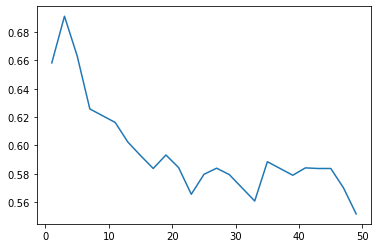

In [33]:
plt.plot(neigbours,cv_scores)

In [34]:
optimal_k_cv=neigbours[cv_scores.index(max(cv_scores))]
optimal_k_cv

3

Training Accuracy:82.4%
    
Testing Accuracy:79%